In [1]:
from google.colab import files

uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv


In [2]:
import pandas as pd

df = pd.read_csv('bestsellers with categories.csv')
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [3]:
print("Розмір датасету:", df.shape)

Розмір датасету: (550, 7)


In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [5]:
print("Кількість пропусків у кожному стовпці:")
print(df.isna().sum())


Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [6]:
print("Унікальні жанри:", df['genre'].unique())

Унікальні жанри: ['Non Fiction' 'Fiction']


Побудуйте діаграму розподілу цін:

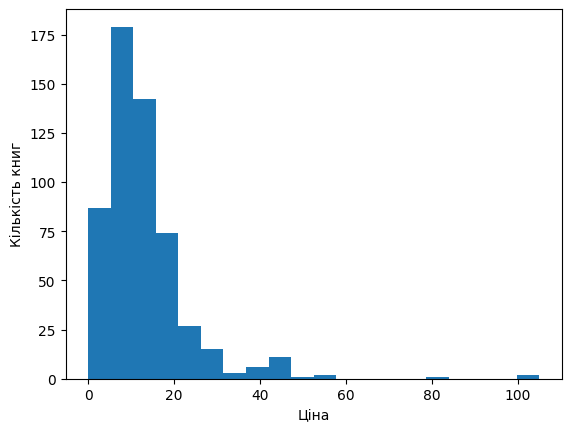

In [7]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20)
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()

Визначте максимальну, мінімальну, середню та медіанну ціни:

In [8]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Знайдіть книгу з найвищим рейтингом:

In [9]:
max_rating = df['user_rating'].max()
max_rating_book = df[df['user_rating'] == max_rating]['name'].iloc[0]

print("Книга з найвищим рейтингом:", max_rating_book)


Книга з найвищим рейтингом: Brown Bear, Brown Bear, What Do You See?


Знайдіть кількість книг з найвищим рейтингом:

In [10]:
count_max_rating = df[df['user_rating'] == max_rating].shape[0]

print("Кількість книг з найвищим рейтингом:", count_max_rating)


Кількість книг з найвищим рейтингом: 52


Знайдіть книгу з найбільшою кількістю відгуків:

In [11]:
max_reviews = df['reviews'].max()
max_reviews_book = df[df['reviews'] == max_reviews]['name'].iloc[0]

print("Книга з найбільшою кількістю відгуків:", max_reviews_book)


Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


Знайдіть найдорожчу книгу серед тих, які потрапили до Топ-50 у 2015 році:

In [12]:
df_2015 = df[df['year'] == 2015]
max_price_2015 = df_2015['price'].max()
max_price_2015_book = df_2015[df_2015['price'] == max_price_2015]['name'].iloc[0]

print("Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році:", max_price_2015_book)


Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


Знайдіть кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році:
python


In [13]:
count_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]

print("Кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році:", count_fiction_2010)


Кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році: 20


Знайдіть кількість книг з рейтингом 4.9, які потрапили до рейтингу у 2010 та 2011 роках:

In [14]:
count_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]

print("Кількість книг з рейтингом 4.9, які потрапили до рейтингу у 2010 та 2011 роках:", count_4_9_2010_2011)


Кількість книг з рейтингом 4.9, які потрапили до рейтингу у 2010 та 2011 роках: 1


Відсортуйте всі книги, які потрапили до рейтингу в 2015 році і коштують менше за 8 доларів:

In [15]:
sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

last_book = sorted_books['name'].iloc[-1]

print("Остання книга у відсортованому списку:", last_book)


Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


Подивімося на максимальну та мінімальну ціни для кожного з жанрів:

In [16]:
genre_price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
print(genre_price_stats)


             max  min
genre                
Fiction       82    0
Non Fiction  105    0


Створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів:

In [17]:
author_book_count = df.groupby('author')['name'].count().reset_index()
print(author_book_count)

                         author  name
0              Abraham Verghese     2
1                Adam Gasiewski     1
2                 Adam Mansbach     1
3                     Adir Levy     1
4    Admiral William H. McRaven     1
..                          ...   ...
243             Walter Isaacson     3
244               William Davis     2
245            William P. Young     2
246            Wizards RPG Team     3
247                Zhi Gang Sha     2

[248 rows x 2 columns]


Знайдіть автора з найбільшою кількістю книг:

In [18]:
max_books_author = author_book_count[author_book_count['name'] == author_book_count['name'].max()]
print("Автор з найбільшою кількістю книг:", max_books_author)


Автор з найбільшою кількістю книг:           author  name
120  Jeff Kinney    12


Створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора:


In [19]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index()
print(author_avg_rating)


                         author  user_rating
0              Abraham Verghese     4.600000
1                Adam Gasiewski     4.400000
2                 Adam Mansbach     4.800000
3                     Adir Levy     4.800000
4    Admiral William H. McRaven     4.700000
..                          ...          ...
243             Walter Isaacson     4.566667
244               William Davis     4.400000
245            William P. Young     4.600000
246            Wizards RPG Team     4.800000
247                Zhi Gang Sha     4.600000

[248 rows x 2 columns]


Знайдіть автора з найнижчим середнім рейтингом:

In [20]:
min_avg_rating_author = author_avg_rating[author_avg_rating['user_rating'] == author_avg_rating['user_rating'].min()]
print("Автор з найнижчим середнім рейтингом:", min_avg_rating_author)


Автор з найнижчим середнім рейтингом:          author  user_rating
71  Donna Tartt          3.9


З'єднайте два датафрейми, щоб для кожного автора було видно кількість книг та середній рейтинг:

In [21]:
author_summary = pd.concat([author_book_count, author_avg_rating['user_rating']], axis=1)
print(author_summary)


                         author  name  user_rating
0              Abraham Verghese     2     4.600000
1                Adam Gasiewski     1     4.400000
2                 Adam Mansbach     1     4.800000
3                     Adir Levy     1     4.800000
4    Admiral William H. McRaven     1     4.700000
..                          ...   ...          ...
243             Walter Isaacson     3     4.566667
244               William Davis     2     4.400000
245            William P. Young     2     4.600000
246            Wizards RPG Team     3     4.800000
247                Zhi Gang Sha     2     4.600000

[248 rows x 3 columns]


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом:

In [23]:
sorted_author_summary = author_summary.sort_values(by=['name', 'user_rating'])
print(sorted_author_summary)


                                 author  name  user_rating
171                      Muriel Barbery     1     4.000000
43                         Chris Cleave     1     4.100000
109                   Ian K. Smith M.D.     1     4.100000
186                        Pierre Dukan     1     4.100000
81                     Elizabeth Strout     1     4.200000
..                                  ...   ...          ...
11   American Psychological Association    10     4.500000
226                     Suzanne Collins    11     4.663636
92                         Gary Chapman    11     4.736364
197                        Rick Riordan    11     4.772727
120                         Jeff Kinney    12     4.800000

[248 rows x 3 columns]


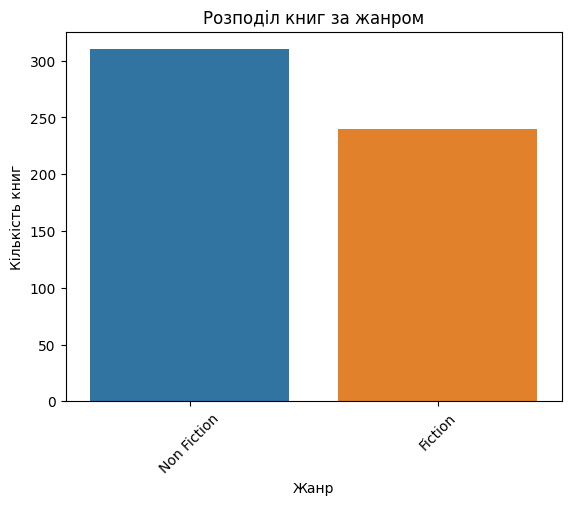

In [24]:
import seaborn as sns

sns.countplot(x='genre', data=df)
plt.title('Розподіл книг за жанром')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')
plt.xticks(rotation=45)
plt.show()

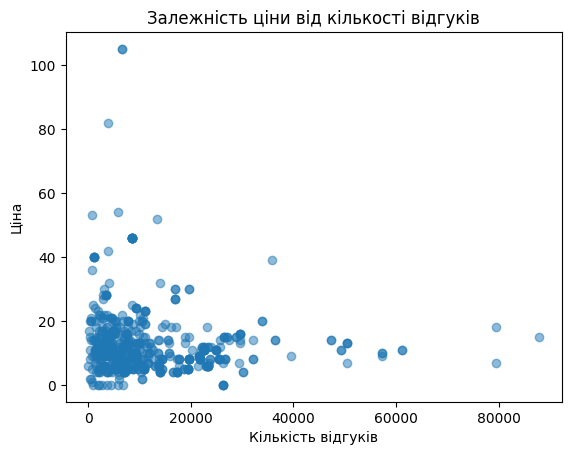

In [25]:
plt.scatter(df['reviews'], df['price'], alpha=0.5)
plt.title('Залежність ціни від кількості відгуків')
plt.xlabel('Кількість відгуків')
plt.ylabel('Ціна')
plt.show()


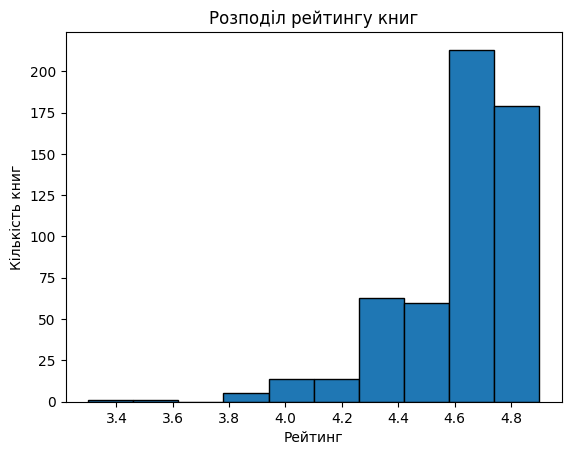

In [26]:
plt.hist(df['user_rating'], bins=10, edgecolor='k')
plt.title('Розподіл рейтингу книг')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()